In [ ]:
More questions: relative normalised expression vs fold change? e.g. fz empty? Why some negative?

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
#or 7x??
#why ZF values are changing so much across experiments
SP1_5x_20201020={0.125:1.00091,0.25:0.92596,0.5:2.15580,0.75:3.01815,1:4.12654}
ZF_5x_20201020={0.125:2.47977,0.25:1.50154,0.5:4.64570,0.75:42.88972,1:19.69370} #not fold change, just norm

SP1_7x_20201020={0.125:1.00091,0.25:0.92596,0.5:2.15580,0.75:3.01815,1:4.12654}
ZF_7x_20201020={0.125:2.47977,0.25:1.50154,0.5:4.64570,0.75:42.88972,1:19.69370}

In [4]:
#SP1_wt_2020702={0.5:1.36870,1:3.11846,2:2.00797} #discarding this as it was the first experiment and there were protocol adjustements after that

#this is missing the 0.5 (fail)
SP1_wt_2020717={0.125:2.18133,0.25:2.74198,0.75:2.79256, 1:1.71345}
#no ZF from 0717, primer fail

#this is the best experiment
SP1_wt_2020709={0.125:1.68559,0.25:2.84942,0.5:3.74315,0.75:2.76530, 1:2.74082} #fold change
ZF_2020709={0.125:0.02466,0.25:0.05381,0.5:0.34476,0.75:0.46896,1:0.25200} #normalised expression, not fold change. Note that it is going down from 0.75 to 1, but expression is going down from 0.5 to 0.75, when the ZF is clearly going up

#this should be used as backup as in some datapoints only 2 measurements instead of three. Plus, data swapped. 
SP1_wt_20201019={0.125:0.71226,0.25:1.95223,0.5:2.62698,0.75:1.08696,1:0.97963}
ZF_20201019={0.125:0.80526,0.25:0.37440,0.5:6.58052,0.75:7.49619, 1: 6.48925} #this needs to be clarified. 

#It seems that ZF expression at 1ug transfection is going down. May be related to increased p21. Discarding this point anyway.

dicts_=[SP1_wt_2020717,SP1_wt_2020709,SP1_wt_20201019]
names_=["0717","0709","1019"]
concentrations=[]
values=[]
names=[]
for d in range(len(dicts_)):
    name=names_[d]
    dict_=dicts_[d]
    for c,v in dict_.items():
        concentrations.append(c)
        values.append(v)
        names.append(name)
data=pd.DataFrame({"concentration":concentrations,"nfc":values,"experiment":names})        

In [5]:
data

,concentration,nfc,experiment
0,0.125,2.18133,0717
1,0.250,2.74198,0717
2,0.750,2.79256,0717
3,1.000,1.71345,0717
4,0.125,1.68559,0709
5,0.250,2.84942,0709
6,0.500,3.74315,0709
7,0.750,2.76530,0709
8,1.000,2.74082,0709
9,0.125,0.71226,1019


<AxesSubplot:xlabel='concentration', ylabel='nfc'>

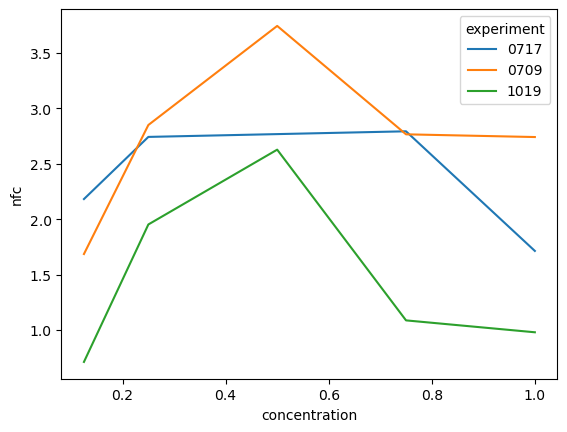

In [7]:
sns.lineplot(x="concentration",y="nfc",hue="experiment",data=data)

<AxesSubplot:xlabel='concentration', ylabel='nfc'>

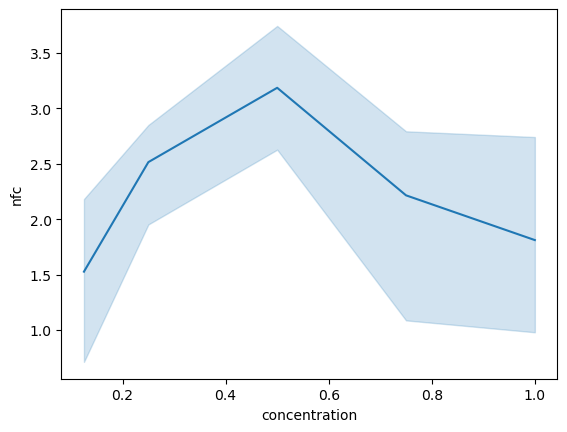

In [9]:

sns.lineplot(x="concentration",y="nfc",data=data[data["concentration"]<2])

In [13]:
#Qhow is the normalisation done here? should actin just be used to normalise?
squelching={"concentration":[0.125,0.25,0.5,0.75,1.0,0.125,0.25,0.5,0.75,1.0,0.125,0.25,0.5,0.75,1.0,0.125,0.25,0.5,0.75,1.0],
            "nfc":[1.04276,1.06080,0.66618,0.99527,0.75658,1.70281,1.03047,1.05512,1.03177,2.06410,0.58311,0.40589,1.33513,0.34642,0.33735,1.68725,1.23252,0.08754,1.08249,4.37638],
            "SD":[0.25460,0.36553,0.10874,0.52364,0.16439,0.76679,0.30947,0.28623,0.09751,1.01504, 0.02819,0.00004,0.11196,0.14139,0.08502,0.64039,0.07992,0.01356,0.59203,0.17000],
            "target":["actin","actin","actin","actin","actin","GAPDH","GAPDH","GAPDH","GAPDH","GAPDH","GFP","GFP","GFP","GFP","GFP","p21","p21","p21","p21","p21"]}

squelchingdf=pd.DataFrame(squelching)

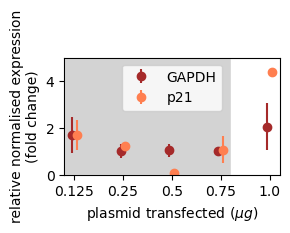

In [14]:

colors=["brown", "coral"]
fig,ax=plt.subplots(1,1,figsize=(3,2))
for t,target in enumerate(["GAPDH", "p21"]):
    subdf=squelchingdf[squelchingdf["target"]==target]
    conc=subdf["concentration"]
    nfc=subdf["nfc"]
    SD=subdf["SD"]
    if t==0:
        offset=-0.05
    else:
        offset=0.05
    ax.errorbar(np.arange(len(conc))+offset,nfc,yerr=SD,fmt='o',label=target,c=colors[t])
ax.set_xticks(np.arange(len(conc)))
ax.set_xticklabels(conc)
ax.set_xlabel("plasmid transfected ($\mu g$)")
ax.axvspan(-0.2,3.2,facecolor="lightgray",edgecolor="white")
ax.legend(loc="upper center")
ax.set_ylabel("relative normalised expression\n(fold change)")
ax.set_xlim(-0.2,4.2)
ax.set_ylim(0,5)
plt.tight_layout()

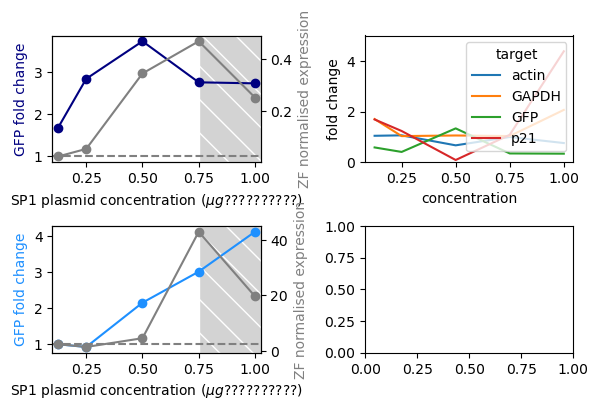

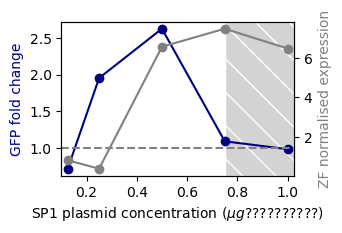

In [15]:
dict1wt=SP1_wt_2020709
dict1ZF=ZF_2020709

dict2wt=SP1_wt_20201019
dict2ZF=ZF_20201019

dictm=SP1_5x_20201020
dictmZF=ZF_5x_20201020

fig,axes=plt.subplots(2,2,figsize=(6,4))
ax=axes[0,1]
sns.lineplot(x="concentration",y="nfc",hue="target",data=squelchingdf,ax=ax)
ax.set_ylabel("fold change")
ax.set_ylim(0,5)

for d,data in enumerate([[dict1wt,dict1ZF,"navy"],[dictm,dictmZF,"dodgerblue"],[dict2wt,dict2ZF,"navy"]]):
    if d<2:
        ax=axes[d][0]
    else:
        plt.tight_layout()
        plt.show()
        fig,ax=plt.subplots(1,1,figsize=(3,2))
    dict1,dict2,color=data

    dict_=dict1
    
    xvals=[x[0] for x in dict_.items()]
    yvals=[x[1] for x in dict_.items()]
    ax.plot(xvals,yvals,marker="o",color=color)

    dict_=dict2
    xvals=[x[0] for x in dict_.items()]
    yvals2=[x[1] for x in dict_.items()]
    ax2=ax.twinx()
    ax2.plot(xvals,yvals2,marker="o",color="gray")
    ax.set_xlabel("SP1 plasmid concentration ($\mu g??????????$)")
    ax.set_ylabel("GFP fold change",color=color)
    ax2.set_ylabel("ZF normalised expression",color="gray")
    ax.axhline(y=1,linestyle="--",color="gray")
    ax.axvspan(0.75,1.025,hatch="\\",facecolor="lightgray",edgecolor="white")
    ax.set_xlim(0.1,1.025)
    #ax.set_xlim(0,0.8)

plt.show()